In [84]:
import matplotlib.pyplot as plt
import torch
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 7.0)
#set all background colors of plot to white in matplotlib
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'white'
matplotlib.rcParams['axes.labelcolor'] = 'black'

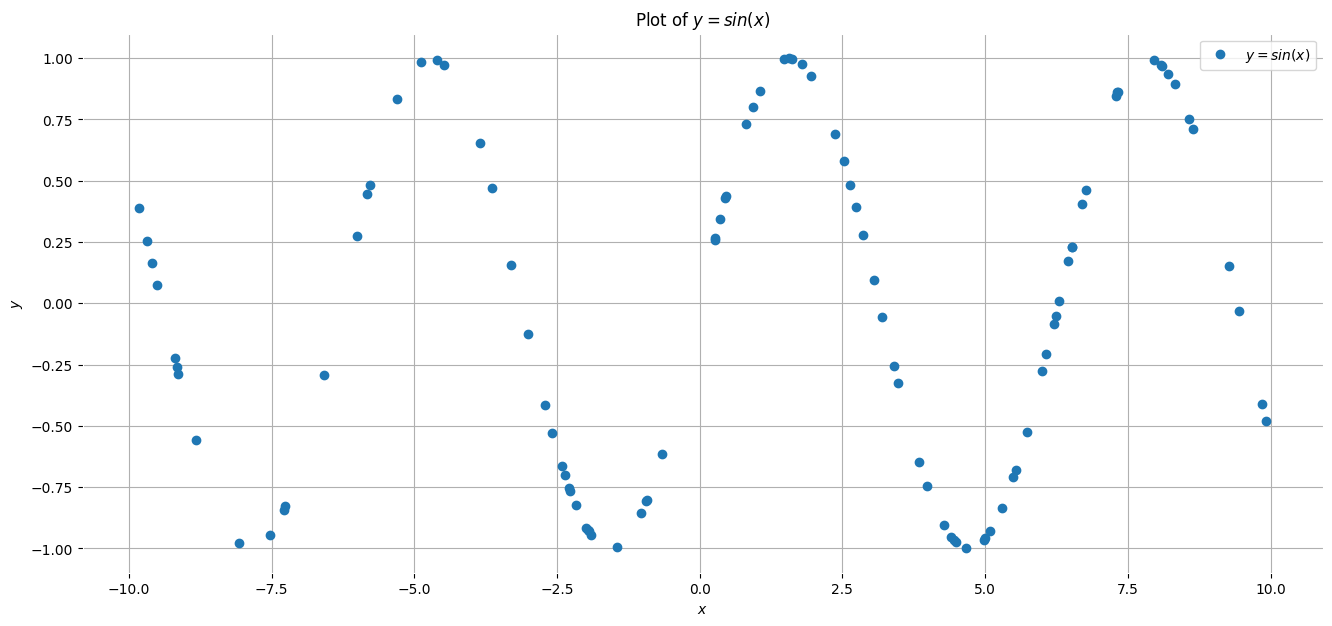

In [85]:
# Create some data
x_trains = torch.rand(100, 1)
x_trains = x_trains * 20.0 - 10.0

y_trains = torch.sin(x_trains)

plt.plot(x_trains.numpy(), y_trains.numpy(), 'o', label='$y = sin(x)$')
plt.title('Plot of $y = sin(x)$')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()


/var/folders/9w/5jg8q39j0lb50m13v89wlvbh0000gn/T/ipykernel_16804/3560751029.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


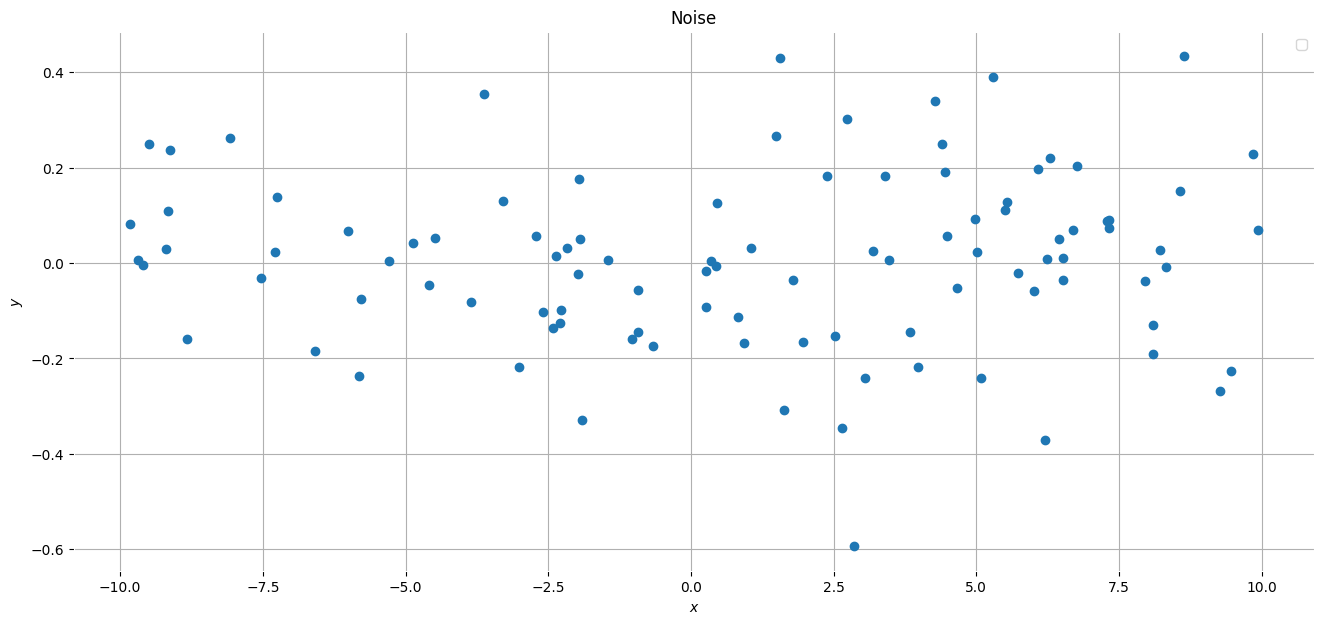

In [86]:
# Add some noise

gaussian_noise = torch.randn(y_trains.shape) / 5.

plt.plot(x_trains.numpy(), gaussian_noise.numpy(), 'o')
plt.title('Noise')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

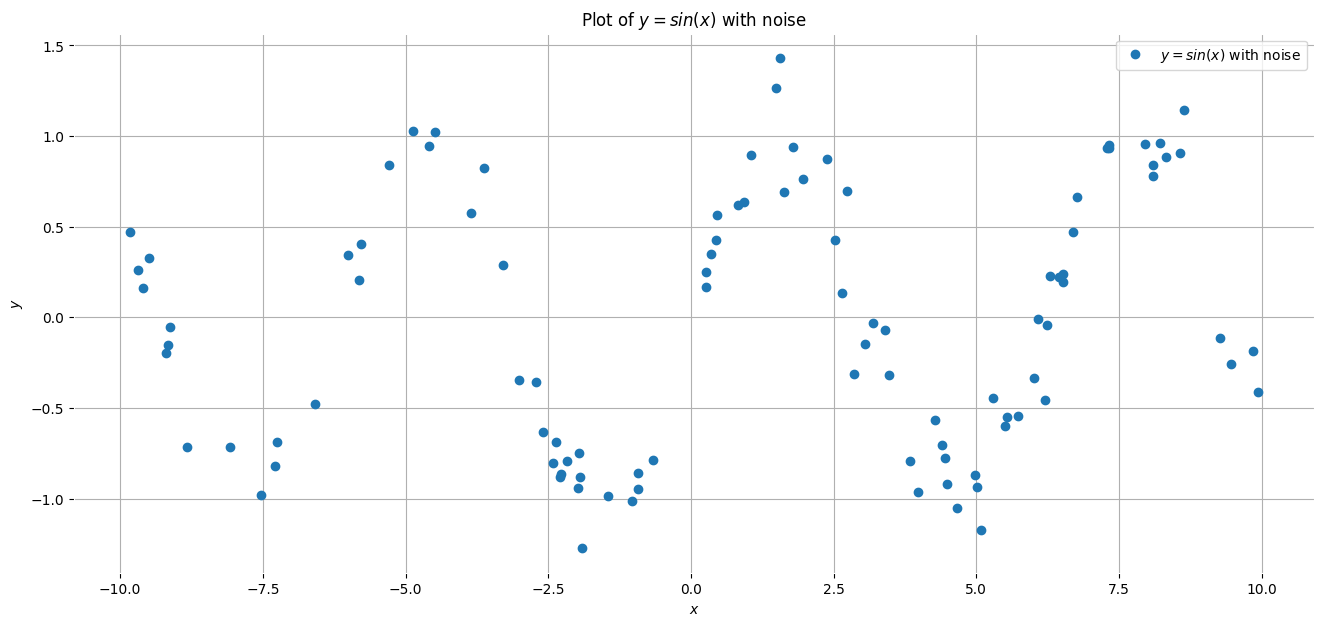

In [87]:
y_trains = y_trains + gaussian_noise

plt.plot(x_trains.numpy(), y_trains.numpy(), 'o', label='$y = sin(x)$ with noise')
plt.title('Plot of $y = sin(x)$ with noise')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

In [88]:
x_trains.unsqueeze_(1)
y_trains.unsqueeze_(1);

In [89]:
tmp = torch.tensor([1, 2 ,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1, 2, 3])
tensor([[1],
        [2],
        [3]])


# Validation data

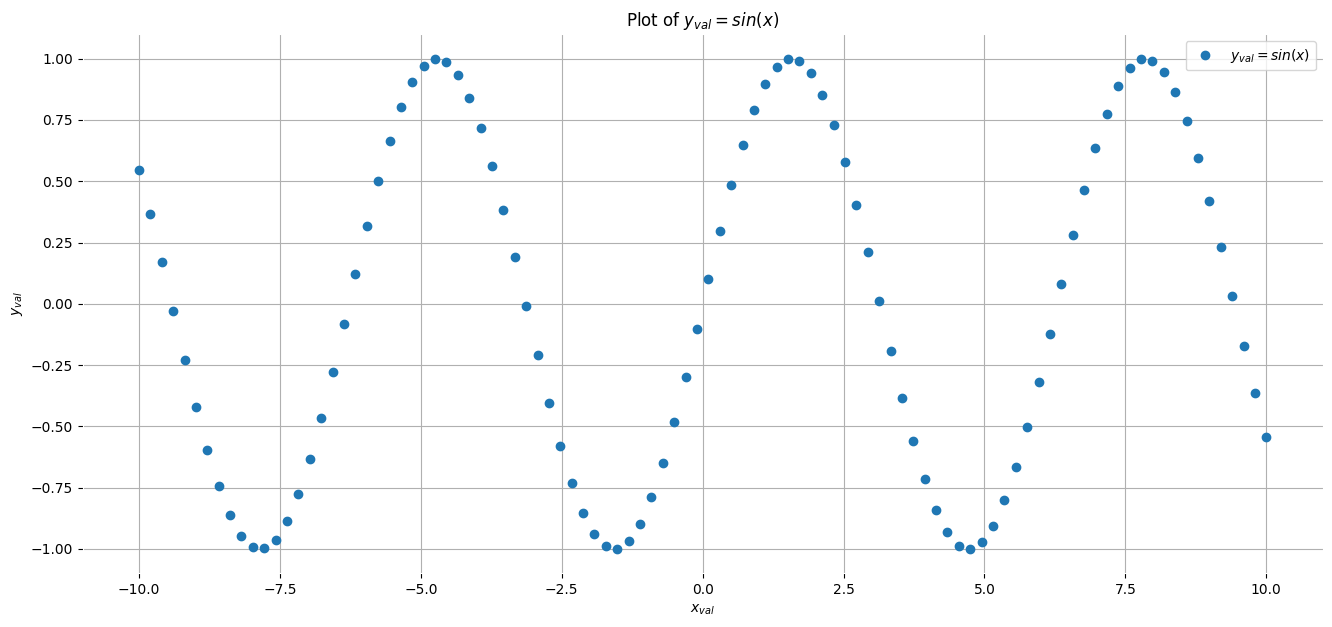

In [90]:
x_val = torch.linspace(-10, 10, 100)
y_val = torch.sin(x_val.data)
plt.plot(x_val.numpy(), y_val.numpy(), 'o', label='$y_{val} = sin(x)$')
plt.title('Plot of $y_{val} = sin(x)$')
plt.grid()
plt.xlabel('$x_{val}$')
plt.ylabel('$y_{val}$')
plt.legend()

In [91]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1);

# Model

In [102]:
class SinNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SinNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    
sin_net = SinNet(100)

# Prediction        

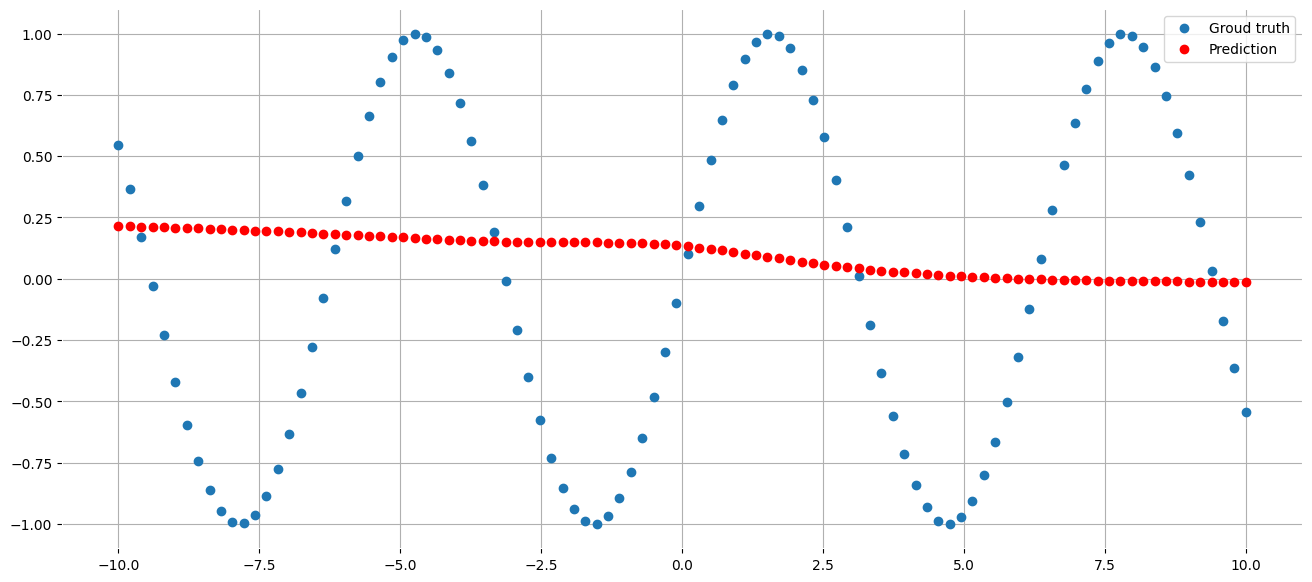

In [103]:
def predict(net, x, y):
    y_pred = net.forward(x)
    
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend()
    plt.grid()
    
predict(sin_net, x_val, y_val)

In [104]:
# Optimizer
optimizer = torch.optim.Adam(sin_net.parameters(), lr=0.01)

In [105]:
# Loss function
def loss(pred, target):
    return ((pred - target)**2).mean()

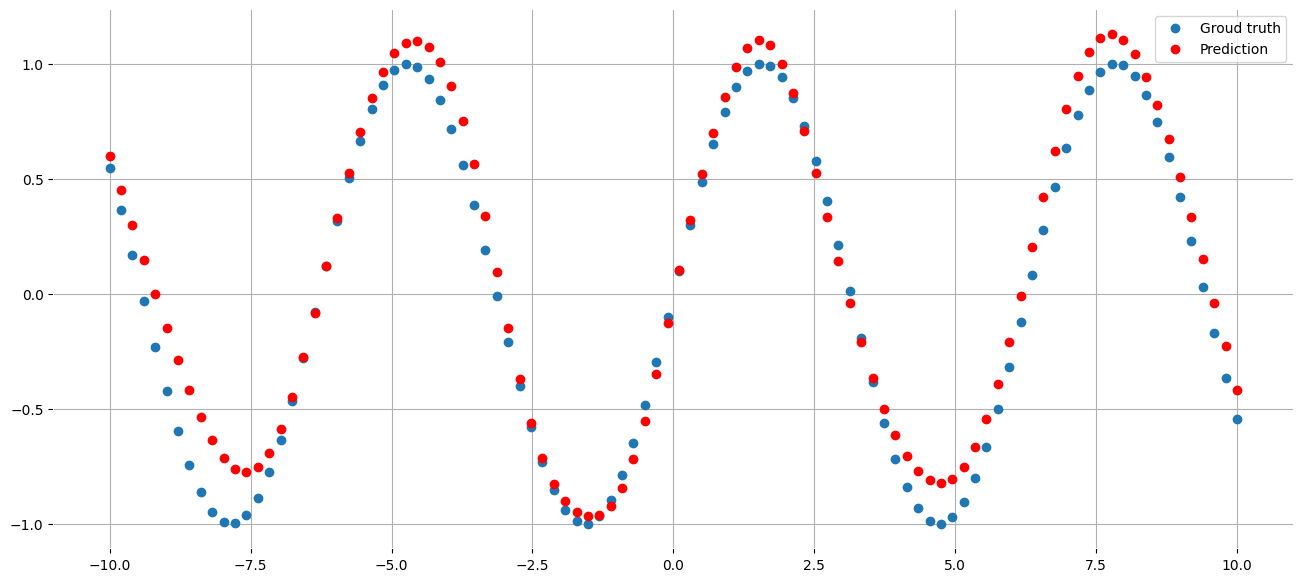

In [106]:
# Trainig procedure

for epoch in range(2000):
    optimizer.zero_grad()
    
    y_pred = sin_net.forward(x_trains)
    loss_val = loss(y_pred, y_trains)
    
    loss_val.backward() # compute gradients
    
    optimizer.step() # update weights
    
predict(sin_net, x_val, y_val)

# Seminar task

In [111]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden, 2*n_hidden)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(2*n_hidden, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
        

net = RegressionNet(30)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    return torch.abs(pred-target).mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    
    loss_value.backward()
    optimizer.step()

def metric(pred, target):
   return (pred - target).abs().mean()
calculated_metric = metric(net.forward(x_validation), y_validation).data
print(0.03 > calculated_metric, calculated_metric)

tensor(True) tensor(0.0238)
